# Build CNNs for Fashion MNIST and Benchmark this with your first assignment!

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Transformations for image normalization and loading fashion MNIST dataset

In [2]:
# Transformations for image normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load Fashion MNIST dataset
train_data = datasets.FashionMNIST(root='data', train=True, transform=transform, download=True)
test_data = datasets.FashionMNIST(root='data', train=False, transform=transform, download=True)

# DataLoader to handle batching
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Define CNN model

In [3]:
# Define the CNN Model
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.fc1 = nn.Linear(128 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 3 * 3)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        return self.fc2(x)

model = FashionCNN()

In [4]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and Evaluation

In [5]:
num_epochs = 10
train_losses, train_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss, correct = 0, 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct / len(train_data))

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%")

# Evaluate on test data
model.eval()
test_loss, correct = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        test_loss += criterion(outputs, labels).item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_loader)
test_accuracy = 100 * correct / len(test_data)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Epoch 1/10, Train Loss: 0.6031, Train Accuracy: 78.08%
Epoch 2/10, Train Loss: 0.3715, Train Accuracy: 86.93%
Epoch 3/10, Train Loss: 0.3152, Train Accuracy: 88.76%
Epoch 4/10, Train Loss: 0.2798, Train Accuracy: 90.08%
Epoch 5/10, Train Loss: 0.2567, Train Accuracy: 90.83%
Epoch 6/10, Train Loss: 0.2355, Train Accuracy: 91.47%
Epoch 7/10, Train Loss: 0.2152, Train Accuracy: 92.16%
Epoch 8/10, Train Loss: 0.2009, Train Accuracy: 92.64%
Epoch 9/10, Train Loss: 0.1849, Train Accuracy: 93.21%
Epoch 10/10, Train Loss: 0.1742, Train Accuracy: 93.50%
Test Loss: 0.2433, Test Accuracy: 91.78%


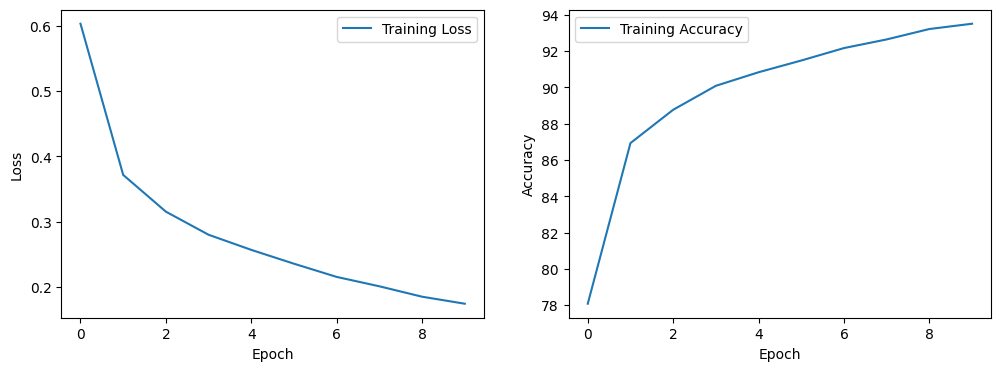

In [6]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

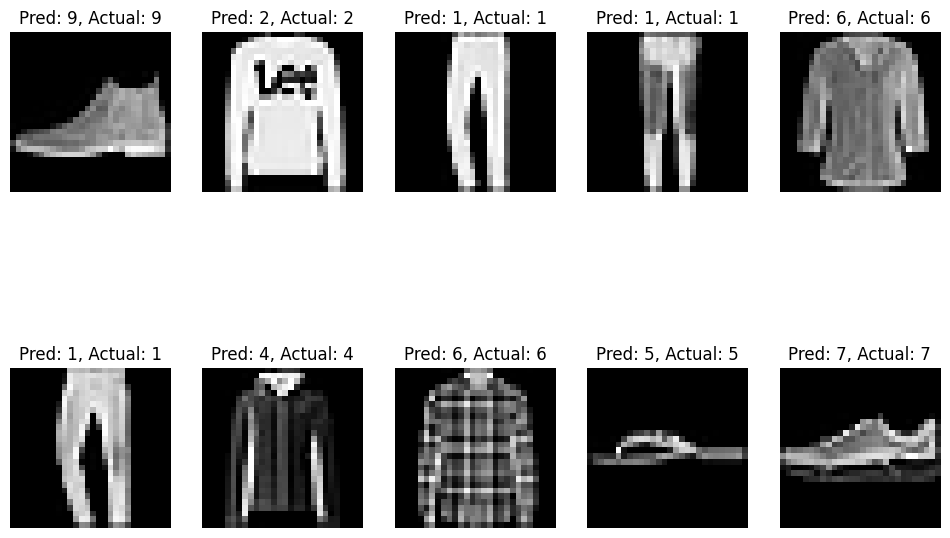

In [7]:
# Display sample predictions
images, labels = next(iter(test_loader))
outputs = model(images)
_, predictions = torch.max(outputs, 1)

fig = plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    img = images[i].squeeze().numpy()
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {predictions[i].item()}, Actual: {labels[i].item()}")
    plt.axis('off')
plt.show()